Root found: -1.7692923542386998


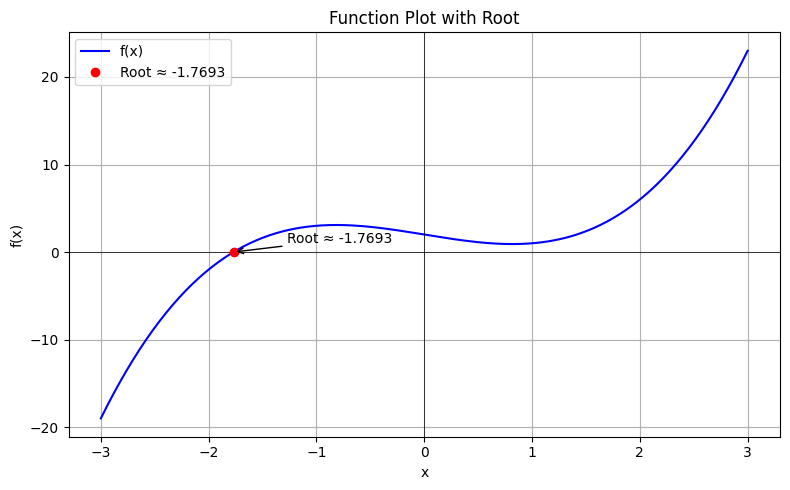

In [3]:
# The Newton and Ranson method for root finding
# The Newton-Raphson method is a powerful numerical technique used to find approximate roots of a real-valued function. It’s particularly useful for solving nonlinear equations of the form:

# f(x)=0
# The method uses the derivative of the function to iteratively converge to a root. The basic idea is to start with an initial guess and refine it using the formula:
# x_{n+1} = x_n - f(x_n) / f'(x_n)
# where:
# - x_n is the current approximation of the root
# - f(x_n) is the value of the function at x_n
# - f'(x_n) is the derivative of the function at x_n
# The process is repeated until the function value is sufficiently close to zero or a maximum number of iterations is reached.
# The Newton-Raphson method is particularly effective for functions that are well-behaved and have a continuous derivative. However, it can fail if the initial guess is too far from the actual root or if the function has inflection points or discontinuities.
# The method is named after Sir Isaac Newton and Joseph Raphson, who independently developed the technique in the 17th century.
# The Newton-Raphson method is widely used in various fields, including engineering, physics, and computer science, for solving equations and optimization problems.

import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Define the function
def f(x):
    return x**3 - 2*x + 2

# Derivative of the function
def f_prime(x):
    return 3*x**2 - 2

# Newton-Raphson Method
def newton_raphson(f, f_prime, x0, tol=1e-6, max_iter=100):
    x_n = x0
    for i in range(max_iter):
        f_xn = f(x_n)
        f_prime_xn = f_prime(x_n)
        if abs(f_xn) < tol:
            return x_n
        if f_prime_xn == 0:
            raise ValueError("Derivative is zero. No solution found.")
        # Newton-Raphson Method iteration
        x_n = x_n - f_xn / f_prime_xn
    raise ValueError("Maximum iterations reached. No solution found.")

# Plotting function with root marker
def plot_function_with_root(f, x_range, root):
    x = np.linspace(x_range[0], x_range[1], 400)
    y = f(x)
    plt.figure(figsize=(8, 5))
    plt.plot(x, y, label='f(x)', color='blue')
    plt.axhline(0, color='black', lw=0.5)
    plt.axvline(0, color='black', lw=0.5)

    # Mark the root
    plt.plot(root, f(root), 'ro', label=f'Root ≈ {root:.4f}')
    plt.annotate(f'Root ≈ {root:.4f}', xy=(root, f(root)), xytext=(root+0.5, f(root)+1),
                 arrowprops=dict(facecolor='red', arrowstyle='->'), fontsize=10)

    plt.title('Function Plot with Root')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

def main():
    # Symbolic setup
    x = sp.symbols('x')
    f_sym = f(x)
    f_prime_sym = sp.diff(f_sym, x)

    # Convert symbolic to numeric
    f_num = sp.lambdify(x, f_sym, 'numpy')
    f_prime_num = sp.lambdify(x, f_prime_sym, 'numpy')

    # Initial guess
    x0 = -2

    # Find root
    root = newton_raphson(f_num, f_prime_num, x0)
    print(f"Root found: {root}")

    # Plot with root
    plot_function_with_root(f_num, (-3, 3), root)

if __name__ == "__main__":
    main()




